Задание
1. Найти и выгрузить многомерные данные с использованием
библиотеки pandas.
2. Вывести информацию о данных при помощи методов .info(),
.head(). Проверить данные на наличие пустых значений. В случае
их наличия удалить данные строки или интерполировать
пропущенные значения. При необходимости дополнительно
предобработать данные для дальнейшей работы с ними.
3. Построить столбчатую диаграмму (.bar) с использованием
библиотеки Plotly со следующими параметрами:

3.1. По оси Х указать дату или название, по оси У указать
количественный показатель.

3.2. Сделать так, чтобы столбец принимал цвет в зависимости от
количественного показателя

3.3. Отобразить заголовок диаграммы, разместив его по центру, с 20
размером текста

3.4. Добавить подписи для осей X и Y с размером текста, равным 16.
Для оси абсцисс развернуть метки так, чтобы они читались снизу
вверх. Для оси ординат шаг меток участить в 1.5 раза

3.5. Размер текста меток осей сделать равным 14

3.6. Обрезать график снизу по минимальному значению
количественного показателя, вычтя из него 10%.

4. Построить круговую диаграмму, использовав данные и оформление
из предыдущего графика
5. Построить линейный график с накопленными значениями
количественного показателя от даты (названия).

5.1. Сделать график с линиями и маркерами, цвет линии 'crimson', цвет
точек 'darkblue', цвет границ точек 'black'.

5.2. Добавить легенду на график в нижнем левом углу

5.3. Добавить сетку на график, сделать цвет 'azure'

5.4. Остальное оформление сохранить с предыдущих графиков.

6. Построить ящик с усами для количества продаж, сохранив
оформление с предыдущих графиков
7. Постараться создать аналогичные графики с использованием
библиотеки matplotlib.
8. На основе проделанной работы составить отчёт с описанием и
скриншотами полученных результатов, сделать выводы о
выбранном организации (процессе) на основе полученных
графиков, сравнить библиотеки.

# **Plotly**

## **Задание 1**

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib as mpl
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## **Задание2**

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


## **Задание 3**

In [ ]:
iris_avg = iris.groupby('Species')['SepalLengthCm'].mean().reset_index()
iris_avg

,Species,SepalLengthCm
0,Iris-setosa,5.006
1,Iris-versicolor,5.936
2,Iris-virginica,6.588


In [ ]:
fig_bar = px.bar(
    iris_avg,
    x='Species',
    y='SepalLengthCm',
    color='SepalLengthCm',
    color_continuous_scale='Viridis',
    title='Средняя длина чашелистика по видам ирисов'
)

fig_bar.update_layout(
    title={'text': 'Средняя длина чашелистика по видам ирисов', 'x': 0.5, 'font': {'size': 20}},
    xaxis_title='Вид ириса',
    yaxis_title='Длина чашелистика (см)',
    xaxis={'tickfont': {'size': 14}, 'tickangle': -90},
    yaxis={'tickfont': {'size': 14}, 'dtick': 1.5},
    coloraxis_showscale=False
)

fig_bar.update_yaxes(range=[iris_avg['SepalLengthCm'].min() * 0.9, iris_avg['SepalLengthCm'].max() * 1.1])
fig_bar.show()

## **Задание 4**

In [ ]:
fig_pie = px.pie(
    iris_avg,
    names='Species',
    values='SepalLengthCm',
    title='Распределение средней длины чашелистика'
)

fig_pie.update_layout(
    title={'text': 'Распределение средней длины чашелистика', 'x': 0.5, 'font': {'size': 20}},
    font=dict(size=14)
)

fig_pie.show()

## **Задание 5**

In [ ]:
iris_cumsum = iris.groupby('Species').cumsum()
fig_line = px.line(
    iris_cumsum,
    y='SepalLengthCm',
    color=iris['Species'],
    markers=True,
    title='Накопленная длина чашелистика'
)

fig_line.update_traces(
    line_color='crimson',
    marker_color='darkblue',
    marker_line_color='black'
)

fig_line.update_layout(
    title={'text': 'Накопленная длина чашелистика', 'x': 0.5, 'font': {'size': 20}},
    xaxis_title='Номер наблюдения',
    yaxis_title='Накопленная длина (см)',
    legend={'x': 0, 'y': -0.2},
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='azure'),
    yaxis=dict(showgrid=True, gridcolor='azure'),
    font=dict(size=14)
)

fig_line.show()

## **Задание 6**

In [ ]:
fig_box = px.box(
    iris,
    x='Species',
    y='SepalLengthCm',
    title='Распределение длины чашелистика'
)

fig_box.update_layout(
    title={'text': 'Распределение длины чашелистика', 'x': 0.5, 'font': {'size': 20}},
    xaxis_title='Вид ириса',
    yaxis_title='Длина чашелистика (см)',
    font=dict(size=14)
)

fig_box.show()

# **Matplotlyb**

## **Задание 1**

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## **Задание 2**

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


## **Задание 3**

In [ ]:
iris_avg = iris.groupby('Species')['SepalLengthCm'].mean().reset_index()
iris_avg

,Species,SepalLengthCm
0,Iris-setosa,5.006
1,Iris-versicolor,5.936
2,Iris-virginica,6.588


<ipython-input-70-9975c55a61e7>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




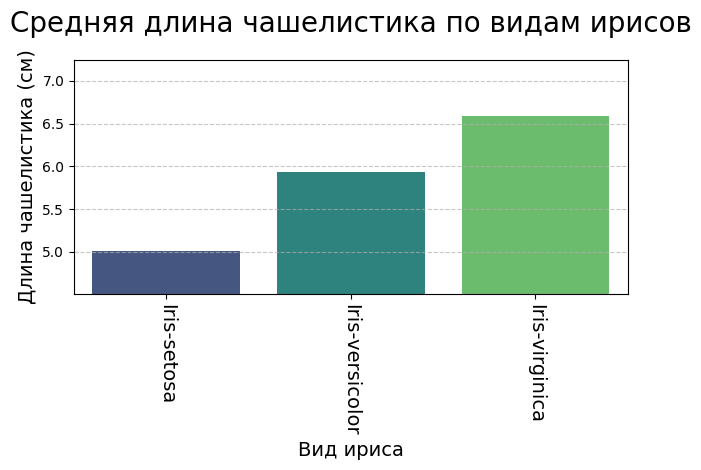

In [ ]:
import seaborn as sns
sns.barplot(
    x='Species',
    y='SepalLengthCm',
    data=iris_avg,
    palette='viridis' # Используем палитру seaborn, похожую на Viridis
)

plt.title('Средняя длина чашелистика по видам ирисов', fontsize=20, loc='center', pad=20)
plt.xlabel('Вид ириса', fontsize=14)
plt.ylabel('Длина чашелистика (см)', fontsize=14)
plt.xticks(rotation=-90, fontsize=14) # Поворот меток по оси X
# Установка диапазона оси Y (аналогично update_yaxes)
min_val = iris_avg['SepalLengthCm'].min() * 0.9
max_val = iris_avg['SepalLengthCm'].max() * 1.1
plt.yticks(np.arange(np.floor(min_val), np.ceil(max_val) + 0.1, 0.5)) # Примерный шаг 1.5
plt.ylim(min_val, max_val)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Добавляем сетку по оси Y
plt.tight_layout()
plt.show()

## **Задание 4**

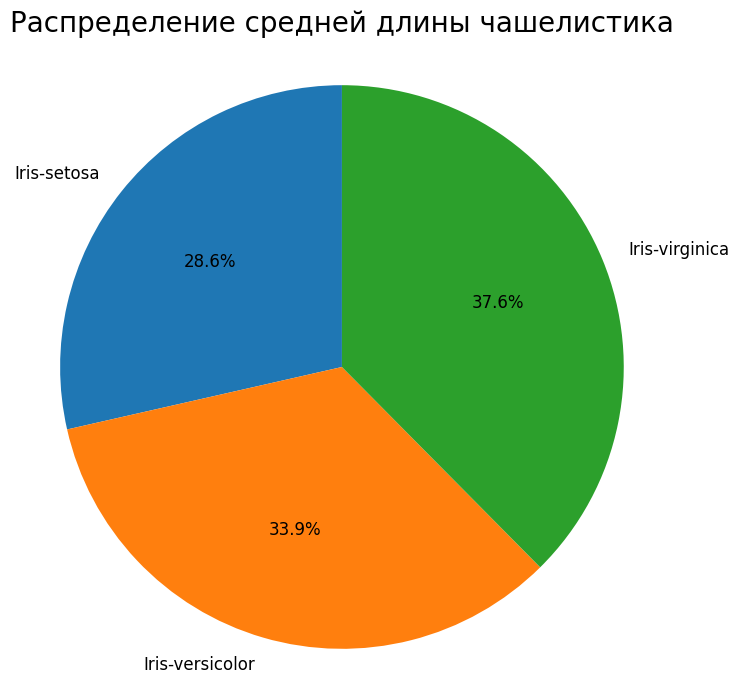

In [ ]:
plt.figure(figsize=(8, 8))

plt.pie(
    iris_avg['SepalLengthCm'],
    labels=iris_avg['Species'],
    autopct='%1.1f%%', # Формат для отображения процентов на срезах
    startangle=90, # Угол, с которого начинается первый срез
    textprops={'fontsize': 12} # Размер шрифта для меток процентов
)
plt.title('Распределение средней длины чашелистика', fontsize=20, loc='center', pad=20)
plt.axis('equal')
plt.show()

## **Задание 5**

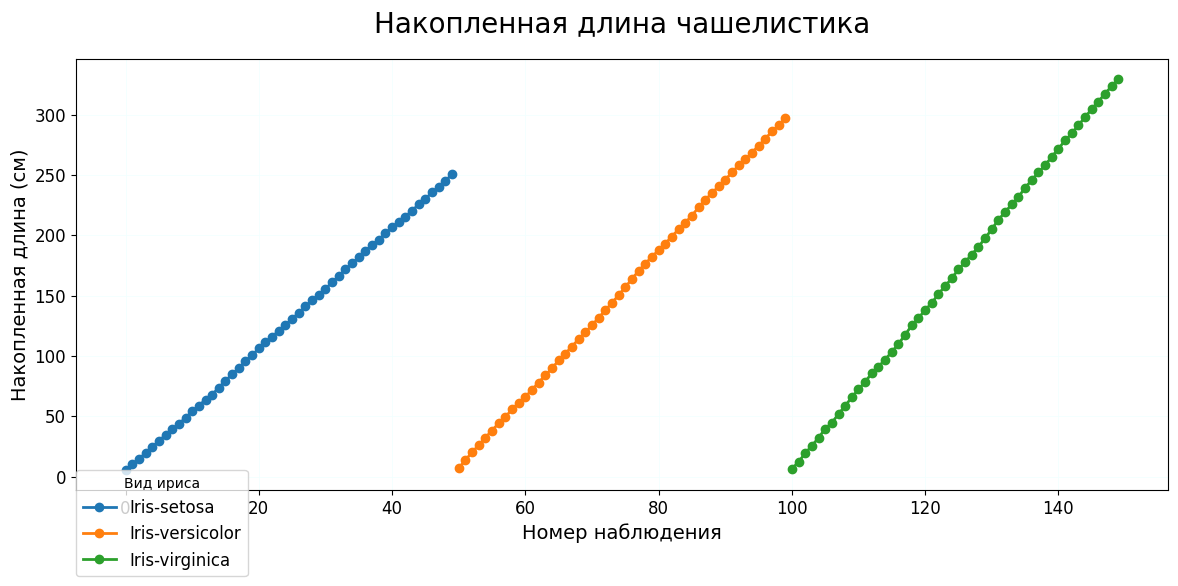

In [ ]:
iris_cumsum_manual = iris.copy()
iris_cumsum_manual['SepalLengthCm_cumsum'] = iris.groupby('Species')['SepalLengthCm'].cumsum()
plt.figure(figsize=(12, 7))
for species_name, group in iris_cumsum_manual.groupby('Species'):
    plt.plot(
        group.index,
        group['SepalLengthCm_cumsum'],
        label=species_name,
        marker='o', # Точки-маркеры
        markersize=6,
        linewidth=2
    )

plt.title('Накопленная длина чашелистика', fontsize=20, loc='center', pad=20)
plt.xlabel('Номер наблюдения', fontsize=14)
plt.ylabel('Накопленная длина (см)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Вид ириса', bbox_to_anchor=(0, -0.2), loc='lower left', borderaxespad=0., fontsize=12) # Легенда под графиком
plt.gca().set_facecolor('white') # Установка цвета фона графика
plt.grid(True, linestyle='-', linewidth=0.5, color='azure') # Сетка
plt.gca().set_axisbelow(True) # Сетка под данными
plt.rcParams['font.size'] = 14

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

## **Задание 6**

<ipython-input-76-89f807d41df5>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




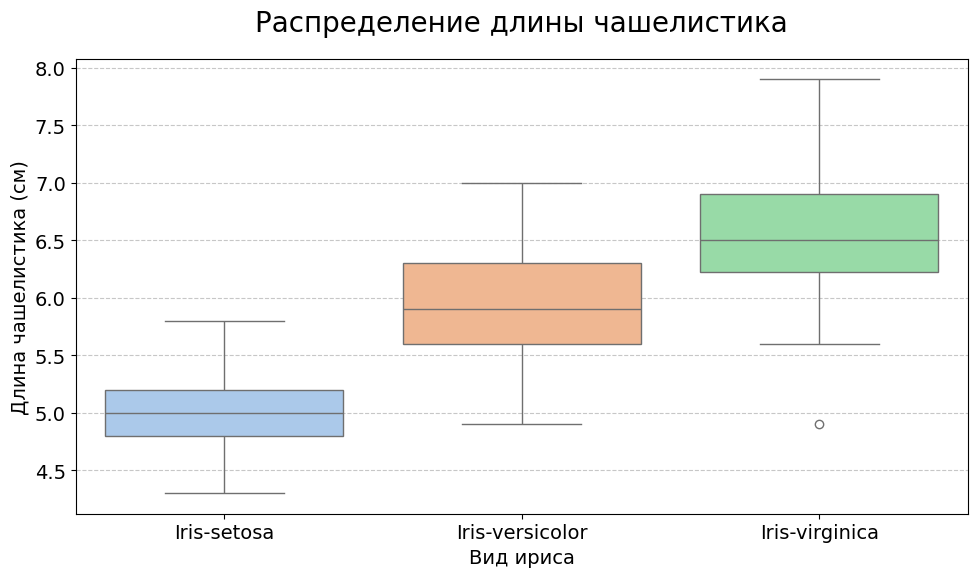

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Species',
    y='SepalLengthCm',
    data=iris,
    palette='pastel' # Можно выбрать другую палитру
)

plt.title('Распределение длины чашелистика', fontsize=20, loc='center', pad=20)
plt.xlabel('Вид ириса', fontsize=14)
plt.ylabel('Длина чашелистика (см)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()